In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [4]:
df = pd.read_csv('./dataset.csv').drop('index',axis=1)
df.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1


1 - Legitimate
0 - Suspicious
-1 - Phishing

In [46]:
df.loc[(df['having_Sub_Domain']==-1) & (df['Result']==1)].shape

(1527, 31)

In [5]:
df['Result'].unique()

array([-1,  1])

In [6]:
print(df.shape)
df.columns

(11055, 31)


Index(['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IPhaving_IP_Address   11055 non-null  int64
 1   URLURL_Length                11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

<AxesSubplot: >

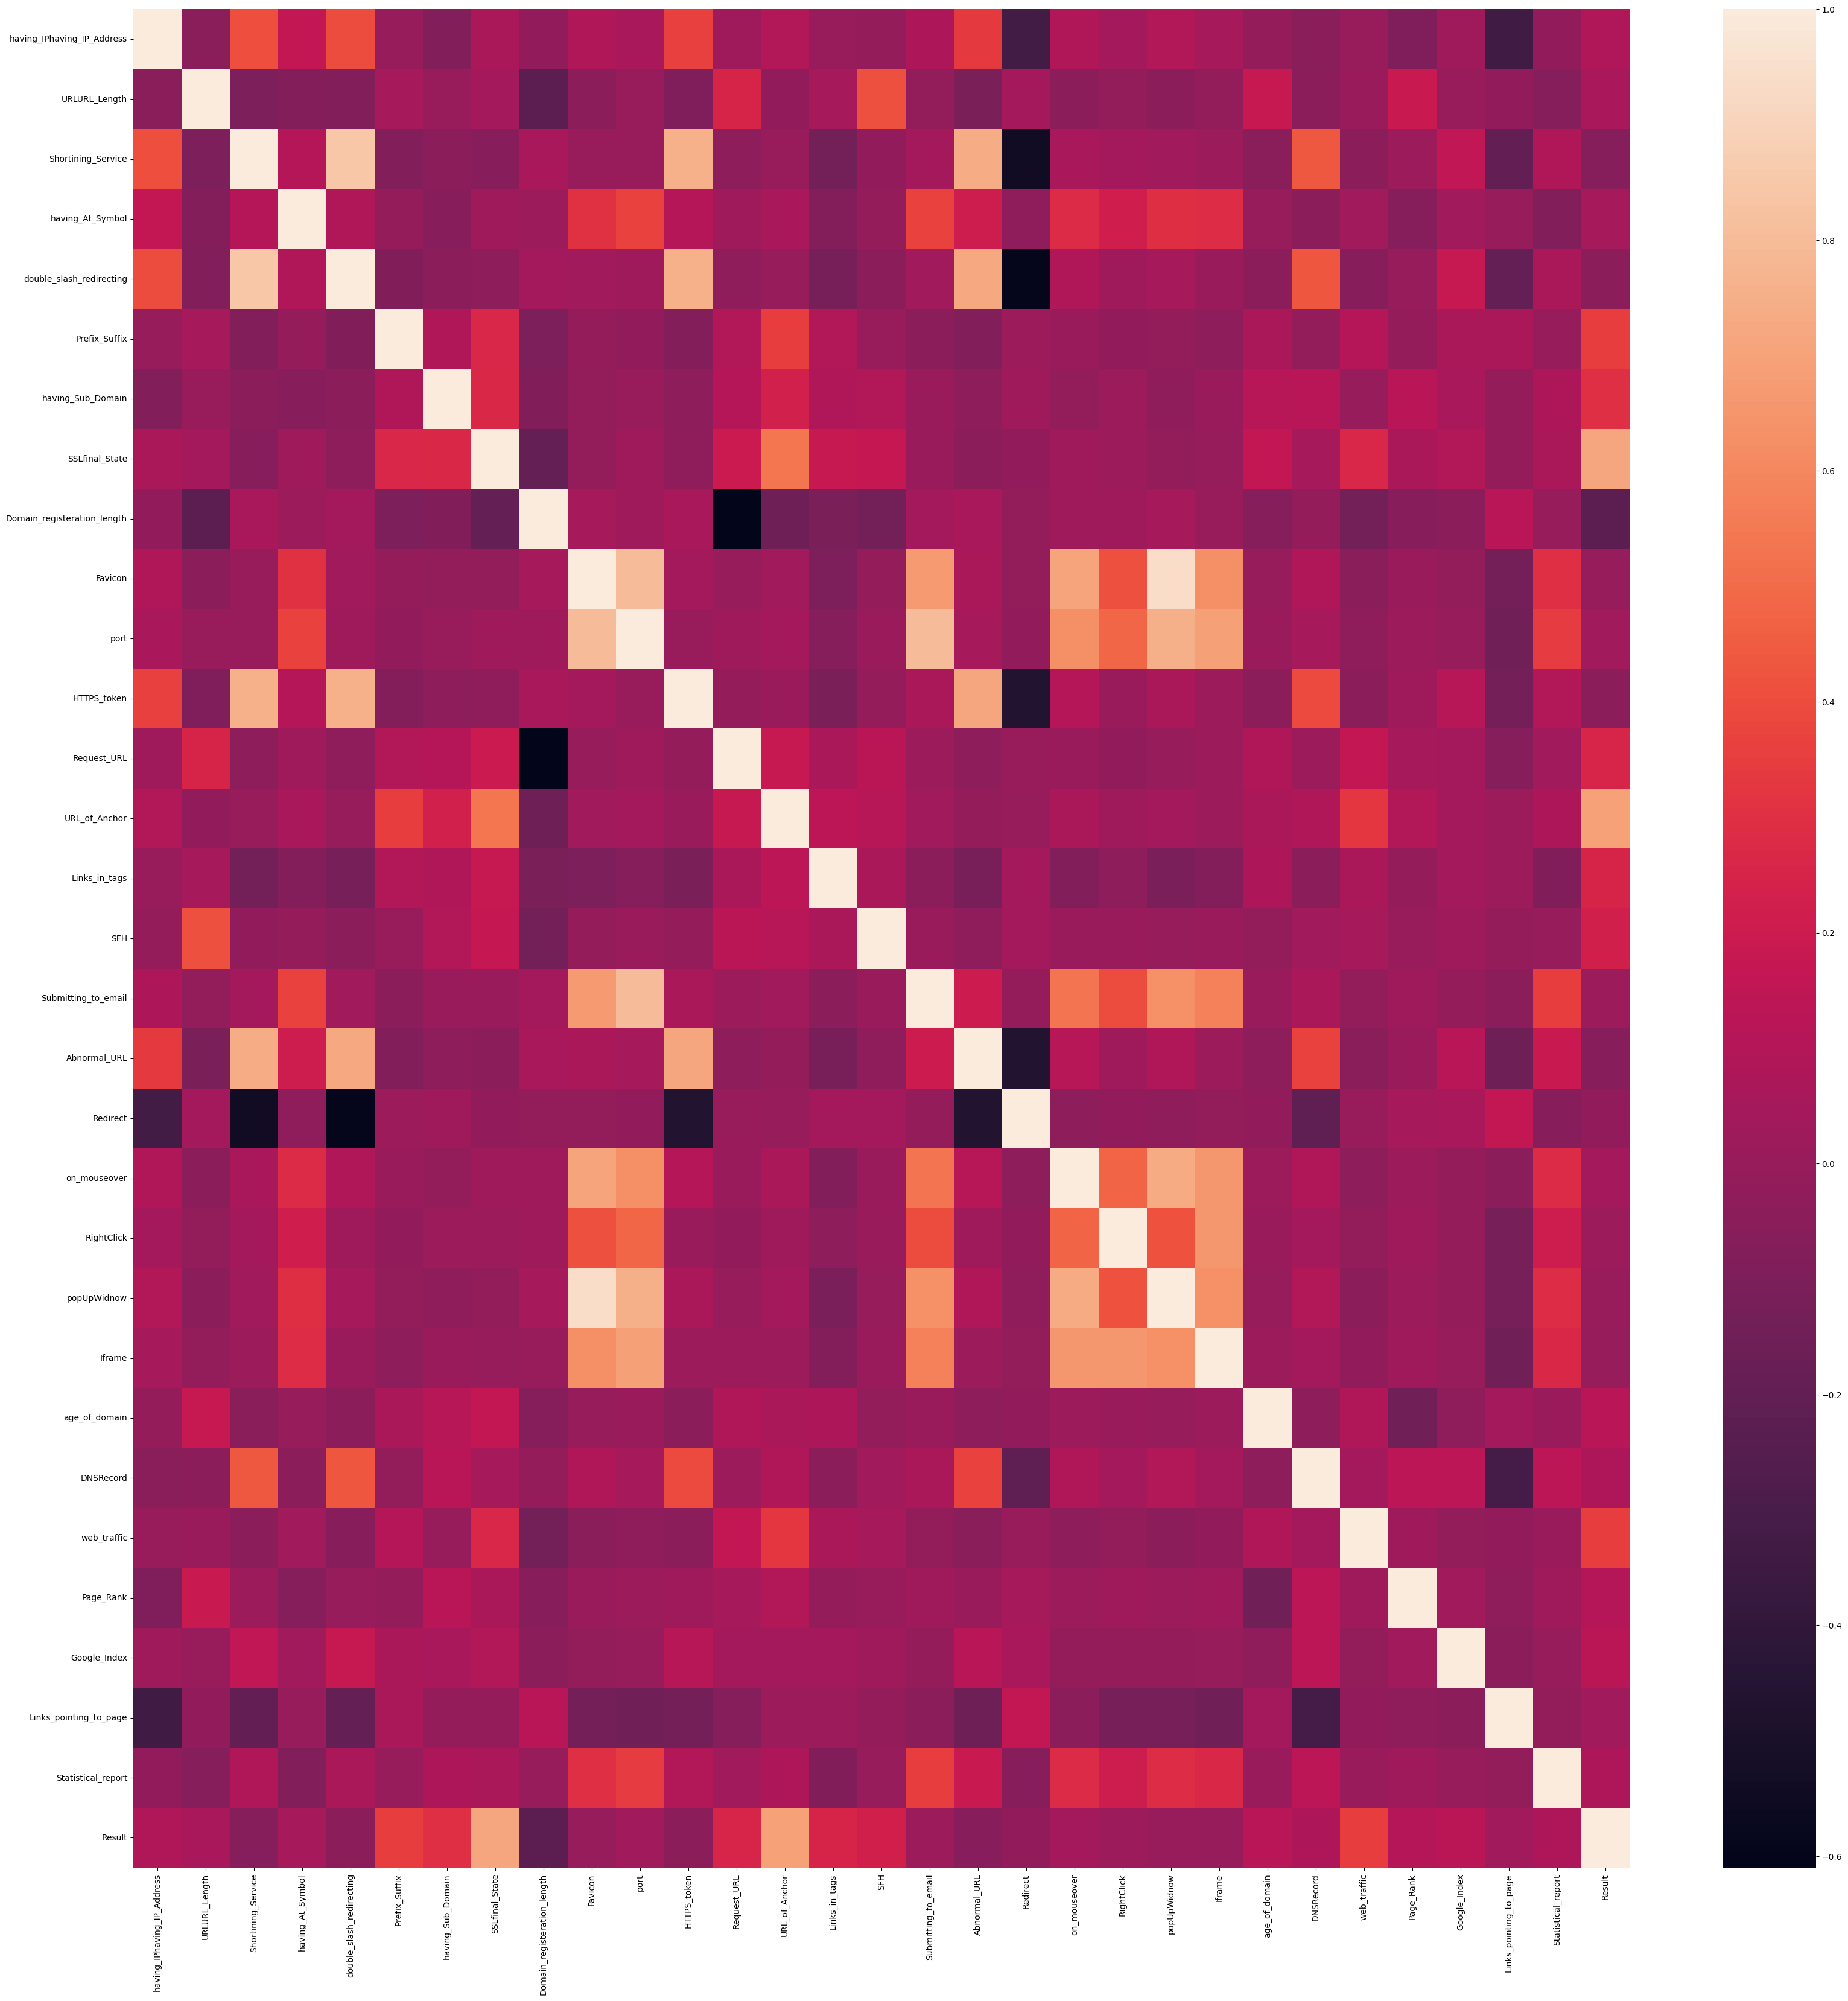

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
corr = df.corr()
sns.heatmap(corr)

In [155]:
c = corr[(corr['Result'] > 0.1) | (corr['Result'] < -0.1)]
c['Result'].index

Index(['Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'age_of_domain', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Result'],
      dtype='object')

In [262]:
c['Result'].sort_values()

Domain_registeration_length   -0.225789
Page_Rank                      0.104645
age_of_domain                  0.121496
Google_Index                   0.128950
SFH                            0.221419
Links_in_tags                  0.248229
Request_URL                    0.253372
having_Sub_Domain              0.298323
web_traffic                    0.346103
Prefix_Suffix                  0.348606
URL_of_Anchor                  0.692935
SSLfinal_State                 0.714741
Result                         1.000000
Name: Result, dtype: float64

In [90]:
dfx=df.iloc[:,[0,1,2,3,4,5,6,8,11,16,18,22,23,25,30]]
dfx.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,Domain_registeration_length,HTTPS_token,Submitting_to_email,Redirect,Iframe,age_of_domain,web_traffic,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,-1,0,1,-1,-1,-1
1,1,1,1,1,1,-1,0,-1,-1,1,0,1,-1,0,-1
2,1,0,1,1,1,-1,-1,-1,-1,-1,0,1,1,1,-1
3,1,0,1,1,1,-1,-1,1,-1,1,0,1,-1,1,-1
4,1,0,-1,1,1,-1,1,-1,1,1,0,1,-1,0,1


In [209]:
dfx.columns

Index(['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'Domain_registeration_length', 'HTTPS_token',
       'Submitting_to_email', 'Redirect', 'Iframe', 'age_of_domain',
       'web_traffic', 'Result'],
      dtype='object')

In [289]:
#df1=df.iloc[:,[0,1,2,3,4,5,6,8,11,16,18,22,23,25,30]]
df1 = df[['double_slash_redirecting','Prefix_Suffix',
       'Domain_registeration_length','HTTPS_token','Iframe','URL_of_Anchor','Links_in_tags', 'SFH', 'age_of_domain', 'Result']]
df1.head()

,double_slash_redirecting,Prefix_Suffix,Domain_registeration_length,HTTPS_token,Iframe,URL_of_Anchor,Links_in_tags,SFH,age_of_domain,Result
0,-1,-1,-1,-1,1,-1,1,-1,-1,-1
1,1,-1,-1,-1,1,0,-1,-1,-1,-1
2,1,-1,-1,-1,1,0,-1,-1,1,-1
3,1,-1,1,-1,1,0,0,-1,-1,-1
4,1,-1,-1,1,1,0,0,-1,-1,1


In [290]:
# from skrules import SkopeRules
from sklearn.model_selection import train_test_split

In [291]:
X=df1.drop("Result",axis=1)
X.head()

,double_slash_redirecting,Prefix_Suffix,Domain_registeration_length,HTTPS_token,Iframe,URL_of_Anchor,Links_in_tags,SFH,age_of_domain
0,-1,-1,-1,-1,1,-1,1,-1,-1
1,1,-1,-1,-1,1,0,-1,-1,-1
2,1,-1,-1,-1,1,0,-1,-1,1
3,1,-1,1,-1,1,0,0,-1,-1
4,1,-1,-1,1,1,0,0,-1,-1


In [292]:
y=df1["Result"]
y

0       -1
1       -1
2       -1
3       -1
4        1
5        1
6       -1
7       -1
8        1
9       -1
10       1
11      -1
12      -1
13      -1
14       1
15      -1
16      -1
17      -1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26      -1
27       1
28       1
29       1
30       1
31       1
32       1
33       1
34      -1
35      -1
36      -1
37      -1
38       1
39       1
40       1
41       1
42      -1
43      -1
44      -1
45       1
46       1
47      -1
48      -1
49       1
50      -1
51       1
52       1
53      -1
54      -1
55      -1
56       1
57       1
58      -1
59      -1
60      -1
61      -1
62       1
63      -1
64       1
65       1
66      -1
67      -1
68       1
69      -1
70       1
71       1
72      -1
73       1
74      -1
75      -1
76       1
77       1
78      -1
79       1
80      -1
81       1
82       1
83       1
84       1
85      -1
86      -1
87       1
88       1
89      -1
90      -1

In [293]:
y.value_counts()

 1    6157
-1    4898
Name: Result, dtype: int64

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [295]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [296]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 12).fit(X_train, y_train) 
predictions = dtree_model.predict(X_test)
predictions_tr = dtree_model.predict(X_train)
print('test:',confusion_matrix(y_test, predictions))
print('test:',accuracy_score(y_test,predictions))
print('train:',confusion_matrix(y_train,predictions_tr))
print('train:',accuracy_score(y_train,predictions_tr))
print(classification_report(y_test,predictions ))

test: [[404  77]
 [ 32 593]]
test: 0.9014466546112115
train: [[3617  800]
 [ 319 5213]]
train: 0.8875263845612624
              precision    recall  f1-score   support

          -1       0.93      0.84      0.88       481
           1       0.89      0.95      0.92       625

    accuracy                           0.90      1106
   macro avg       0.91      0.89      0.90      1106
weighted avg       0.90      0.90      0.90      1106



In [297]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 20, max_depth=10,max_features='auto')
rfc.fit(X_train, y_train)
predictions =rfc.predict(X_test)
predictions_tr = rfc.predict(X_train)
print('test:\n',confusion_matrix(y_test, predictions))
print('test:',accuracy_score(y_test,predictions))
print('train:\n',confusion_matrix(y_train,predictions_tr))
print('train:',accuracy_score(y_train,predictions_tr))
print(classification_report(y_test,predictions ))

/home/kokurou/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


test:
 [[401  80]
 [ 29 596]]
test: 0.9014466546112115
train:
 [[3606  811]
 [ 309 5223]]
train: 0.8874258719469293
              precision    recall  f1-score   support

          -1       0.93      0.83      0.88       481
           1       0.88      0.95      0.92       625

    accuracy                           0.90      1106
   macro avg       0.91      0.89      0.90      1106
weighted avg       0.90      0.90      0.90      1106



In [298]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train) 
predictions =knn.predict(X_test)
predictions_tr = knn.predict(X_train)
print('test:\n',confusion_matrix(y_test, predictions))
print('test:',accuracy_score(y_test,predictions))
print('train:\n',confusion_matrix(y_train,predictions_tr))
print('train:',accuracy_score(y_train,predictions_tr))
print(classification_report(y_test,predictions ))

test:
 [[420  61]
 [ 53 572]]
test: 0.8969258589511754
train:
 [[3676  741]
 [ 486 5046]]
train: 0.8766710222132877
              precision    recall  f1-score   support

          -1       0.89      0.87      0.88       481
           1       0.90      0.92      0.91       625

    accuracy                           0.90      1106
   macro avg       0.90      0.89      0.89      1106
weighted avg       0.90      0.90      0.90      1106



In [299]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1,max_depth=8, random_state=0).fit(X_train, y_train)
predictions =gbc.predict(X_test)
predictions_tr = gbc.predict(X_train)
print(predictions)
print('test:\n',confusion_matrix(y_test, predictions))
print('test:',accuracy_score(y_test,predictions))
print('train:\n',confusion_matrix(y_train,predictions_tr))
print('train:',accuracy_score(y_train,predictions_tr))
print(classification_report(y_test,predictions ))

[-1 -1  1 ...  1 -1  1]
test:
 [[401  80]
 [ 30 595]]
test: 0.9005424954792043
train:
 [[3598  819]
 [ 302 5230]]
train: 0.8873253593325963
              precision    recall  f1-score   support

          -1       0.93      0.83      0.88       481
           1       0.88      0.95      0.92       625

    accuracy                           0.90      1106
   macro avg       0.91      0.89      0.90      1106
weighted avg       0.90      0.90      0.90      1106



In [300]:
import joblib
filename = '../api-files/gbc.pkl'
joblib.dump(gbc, filename)

['../api-files/gbc.pkl']

In [301]:
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.9005424954792043
